In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt
import matplotlib


# from analysis_plot_kit.core import fig_generator
from psPlotKit.data_plotter.fig_generator import figureGenerator

C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_16416\3709177697.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# read in data
data_property_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_sea.csv')
data_property_nacl = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_nacl.csv')
data_property_simple = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_simple.csv')
# data_property_reatoro_RO = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_RO_reaktoro.csv')
# data_property_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_MVC_reaktoro.csv')
# Feed TDS,Temperature,Enthalpy,Vap Pressure,Osmotic Pressure,Density

In [3]:
# find errors and create dataframe
results_col = ["Osmotic Pressure", "Density","Vap Pressure", "Enthalpy"] 
error_sea = pd.DataFrame()
error_nacl = pd.DataFrame()
error_simple = pd.DataFrame()

for i in results_col:
    error_sea[i] = 0
    error_nacl[i] = pd.DataFrame(abs(data_property_seawater[i] - data_property_nacl[i]) / data_property_seawater[i]) * 100
    error_simple[i] = pd.DataFrame(abs(data_property_seawater[i] - data_property_simple[i]) / data_property_seawater[i]) * 100


In [4]:
# NaCl errors
for i in results_col:
    print(i)
    print(min(error_nacl[i]))
    print(max(error_nacl[i]))

Osmotic Pressure
4.546108240947433
10.175411942804029
Density
0.21435492869516978
0.5307944674346795
Vap Pressure
0.2179662475164742
5.738179262133679
Enthalpy
1.9785135224467312
15.595137702092124


In [5]:
# NaCl errors
for i in results_col:
    print(i)
    print(min(error_simple[i]))
    print(max(error_simple[i]))

Osmotic Pressure
0.40736226063562253
24.73703471591672
Density
0.1325454504127144
10.053014753104526
Vap Pressure
10.083470671771314
651.0375721908692
Enthalpy
5.195659398691353
36.80507179778371


In [6]:
# xticks = ([3.361113e-02,4.838276e-02,9.373868e-02,1.366460e-01,1.775197e-01]) # actual input varied in parameter sweep
x_plot = np.repeat([34.4, 50.0, 100.0, 150.0, 200.0], 8) #kg/m3 Reaktoro @ 25 C
xticks = ([34.4, 50.0, 100.0, 150.0, 200.0])
yticks = np.linspace(
    min(data_property_nacl["Temperature"])- 273.15, max(data_property_nacl["Temperature"])- 273.15, 8
)
xticks = xticks
yticks = np.around(yticks, decimals=0)

(40,)
[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 23.95903 34.4 25.0
[0] [1] 24.72619 34.4 35.0
[0] [2] 25.44252 34.4 45.0
[0] [3] 26.1067 34.4 55.0
[0] [4] 26.71775 34.4 65.0
[0] [5] 27.27503 34.4 75.0
[0] [6] 27.77819 34.4 85.0
[0] [7] 28.22711 34.4 95.0
[1] [0] 34.74719 50.0 25.0
[1] [1] 35.86802 50.0 35.0
[1] [2] 36.91328 50.0 45.0
[1] [3] 37.88075 50.0 55.0
[1] [4] 38.76878 50.0 65.0
[1] [5] 39.57619 50.0 75.0
[1] [6] 40.3022 50.0 85.0
[1] [7] 40.94645 50.0 95.0
[2] [0] 70.05536 100.0 25.0
[2] [1] 72.4225 100.0 35.0
[2] [2] 74.62244 100.0 45.0
[2] [3] 76.6484 100.0 55.0
[2] [4] 78.49479 100.0 65.0
[2] [5] 80.15703 100.0 75.0
[2] [6] 81.63152 100.0 85.0
[2] [7] 82.91547 100.0 95.0
[3] [0] 107.8707 150.0 25.0
[3] [1] 111.7521 150.0 35.0
[3] [2] 115.3506 150.0 45.0
[3] [3] 118.6515 150.0 55.0
[3] [4] 121.6422 150.0 65.0
[3] [5] 124.3115 150.0 75.0
[3] [6] 126.6503 150.0 85.0
[3] [7] 128.6504 150.0 95.0
[4] [0] 149.0369 200.0 25.0
[4] [1] 154.7582 200.0 3

C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_16416\3186637258.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_16416\3186637258.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


(40,)
[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 1021.67 34.4 25.0
[0] [1] 1018.39 34.4 35.0
[0] [2] 1014.372 34.4 45.0
[0] [3] 1009.699 34.4 55.0
[0] [4] 1004.446 34.4 65.0
[0] [5] 998.6763 34.4 75.0
[0] [6] 992.4403 34.4 85.0
[0] [7] 985.7787 34.4 95.0
[1] [0] 1032.058 50.0 25.0
[1] [1] 1028.631 50.0 35.0
[1] [2] 1024.502 50.0 45.0
[1] [3] 1019.754 50.0 55.0
[1] [4] 1014.457 50.0 65.0
[1] [5] 1008.673 50.0 75.0
[1] [6] 1002.45 50.0 85.0
[1] [7] 995.8254 50.0 95.0
[2] [0] 1062.197 100.0 25.0
[2] [1] 1058.344 100.0 35.0
[2] [2] 1053.896 100.0 45.0
[2] [3] 1048.928 100.0 55.0
[2] [4] 1043.505 100.0 65.0
[2] [5] 1037.68 100.0 75.0
[2] [6] 1031.494 100.0 85.0
[2] [7] 1024.977 100.0 95.0
[3] [0] 1088.496 150.0 25.0
[3] [1] 1084.27 150.0 35.0
[3] [2] 1079.544 150.0 45.0
[3] [3] 1074.385 150.0 55.0
[3] [4] 1068.851 150.0 65.0
[3] [5] 1062.99 150.0 75.0
[3] [6] 1056.836 150.0 85.0
[3] [7] 1050.414 150.0 95.0
[4] [0] 1111.766 200.0 25.0
[4] [1] 1107.211 200.0 35.

C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_16416\3186637258.py:66: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


(40,)
[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 0.03115605 34.4 25.0
[0] [1] 0.05532618 34.4 35.0
[0] [2] 0.09430939 34.4 45.0
[0] [3] 0.15493110000000002 34.4 55.0
[0] [4] 0.2461514 34.4 65.0
[0] [5] 0.3793952 34.4 75.0
[0] [6] 0.5688567 34.4 85.0
[0] [7] 0.8317652000000001 34.4 95.0
[1] [0] 0.03089426 50.0 25.0
[1] [1] 0.0548613 50.0 35.0
[1] [2] 0.09351695 50.0 45.0
[1] [3] 0.1536293 50.0 55.0
[1] [4] 0.24408310000000003 50.0 65.0
[1] [5] 0.3762073 50.0 75.0
[1] [6] 0.5640769 50.0 85.0
[1] [7] 0.8247762 50.0 95.0
[2] [0] 0.03001764 100.0 25.0
[2] [1] 0.05330461 100.0 35.0
[2] [2] 0.09086341 100.0 45.0
[2] [3] 0.1492701 100.0 55.0
[2] [4] 0.2371573 100.0 65.0
[2] [5] 0.3655325 100.0 75.0
[2] [6] 0.5480712 100.0 85.0
[2] [7] 0.8013732000000001 100.0 95.0
[3] [0] 0.0291205 150.0 25.0
[3] [1] 0.051711499999999994 150.0 35.0
[3] [2] 0.08814777 150.0 45.0
[3] [3] 0.1448088 150.0 55.0
[3] [4] 0.2300693 150.0 65.0
[3] [5] 0.3546078 150.0 75.0
[3] [6] 0.531691

C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_16416\3186637258.py:97: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


(40,)
[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 99.38623 34.4 25.0
[0] [1] 138.7415 34.4 35.0
[0] [2] 177.9543 34.4 45.0
[0] [3] 217.0069 34.4 55.0
[0] [4] 255.88170000000002 34.4 65.0
[0] [5] 294.5607 34.4 75.0
[0] [6] 333.0264 34.4 85.0
[0] [7] 371.261 34.4 95.0
[1] [0] 97.04655 50.0 25.0
[1] [1] 135.4811 50.0 35.0
[1] [2] 173.722 50.0 45.0
[1] [3] 211.7339 50.0 55.0
[1] [4] 249.48160000000001 50.0 65.0
[1] [5] 286.92990000000003 50.0 75.0
[1] [6] 324.0435 50.0 85.0
[1] [7] 360.7872 50.0 95.0
[2] [0] 89.99066 100.0 25.0
[2] [1] 126.0643 100.0 35.0
[2] [2] 161.79129999999998 100.0 45.0
[2] [3] 197.0856 100.0 55.0
[2] [4] 231.8613 100.0 65.0
[2] [5] 266.03229999999996 100.0 75.0
[2] [6] 299.5127 100.0 85.0
[2] [7] 332.2164 100.0 95.0
[3] [0] 83.64832000000001 150.0 25.0
[3] [1] 117.9769 150.0 35.0
[3] [2] 151.8205 150.0 45.0
[3] [3] 185.04870000000003 150.0 55.0
[3] [4] 217.5313 150.0 65.0
[3] [5] 249.1379 150.0 75.0
[3] [6] 279.7382 150.0 85.0
[3] [7] 3

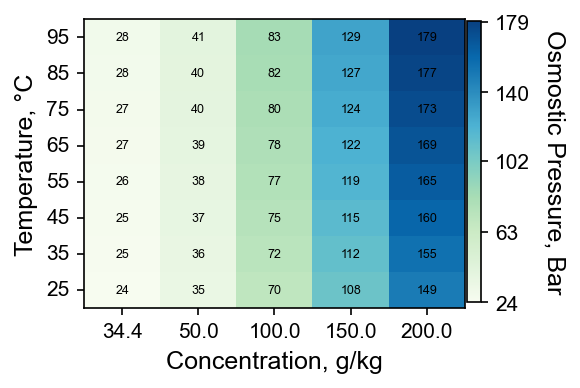

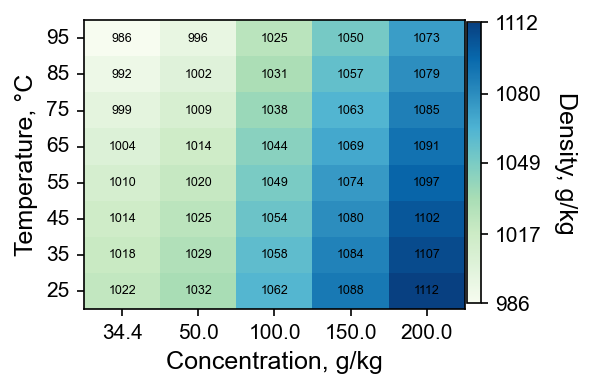

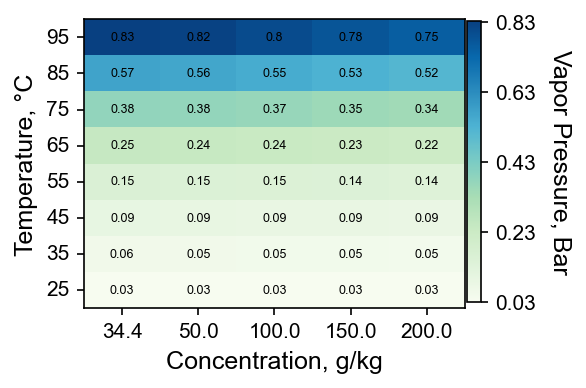

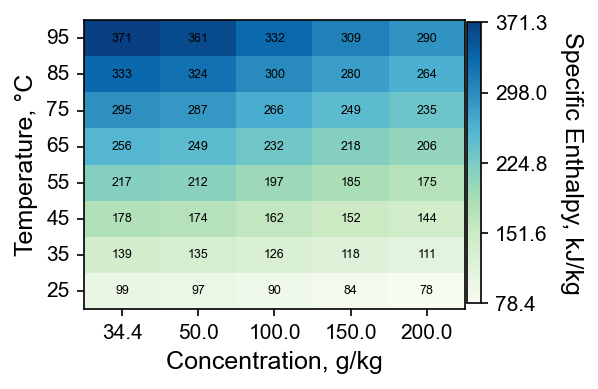

In [7]:

vmin = np.min(data_property_seawater["Osmotic Pressure"])/1e5
vmax = np.max(data_property_seawater["Osmotic Pressure"])/1e5

zticks = np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=0)
figure = figureGenerator()
figure.init_figure(width=3.5, height=2.5)
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.plot_map(
    xdata=x_plot,
    ydata=data_property_seawater["Temperature"] - 273.15,
    zdata=data_property_seawater["Osmotic Pressure"]/1e5,
    text=True,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=0, zlabel="Osmostic Pressure, Bar")
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Concentration, g/kg",
    ylabel="Temperature, °C",
)
figure.save_fig(name="plot_sea_osm_p")

vmin = np.min(data_property_seawater["Density"])
vmax = np.max(data_property_seawater["Density"])

zticks = np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=0)
figure = figureGenerator()
figure.init_figure(width=3.5, height=2.5)
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.plot_map(
    xdata=x_plot,
    ydata=data_property_seawater["Temperature"] - 273.15,
    zdata=data_property_seawater["Density"],
    text=True,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=0, zlabel="Density, g/kg")
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Concentration, g/kg",
    ylabel="Temperature, °C",
)
figure.save_fig(name="plot_sea_dens")

vmin = np.min(data_property_seawater["Vap Pressure"])/1e5
vmax = np.max(data_property_seawater["Vap Pressure"])/1e5

zticks = np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=2)
figure = figureGenerator()
figure.init_figure(width=3.5, height=2.5)
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.plot_map(
    xdata=x_plot,
    ydata=data_property_seawater["Temperature"] - 273.15,
    zdata=data_property_seawater["Vap Pressure"]/1e5,
    text=True,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=2, zlabel="Vapor Pressure, Bar")
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Concentration, g/kg",
    ylabel="Temperature, °C",
)
figure.save_fig(name="plot_sea_vap_p")
ref = 0
vmin = np.min(data_property_seawater["Enthalpy"])/1000
vmax = np.max(data_property_seawater["Enthalpy"])/1000
vmin = abs(vmin-ref)
vmax = abs(vmax-ref)

zticks = np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=2)
figure = figureGenerator()
figure.init_figure(width=3.5, height=2.5)
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.plot_map(
    xdata=x_plot,
    ydata=data_property_seawater["Temperature"] - 273.15,
    zdata=abs(data_property_seawater["Enthalpy"] - ref)/1000,
    text=True,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=1, zlabel="Specific Enthalpy, kJ/kg")
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Concentration, g/kg",
    ylabel="Temperature, °C",
)
figure.save_fig(name="plot_sea_enthalpy")

In [13]:
def colormap_prop_error(data, error_data, xticks, yticks, z_format=0, i = "Osmotic Pressure", file_name="file"):
    # vmin = np.min([np.min(error_sea[i]), np.min(error_nacl[i]), np.min(error_simple[i])])
    vmin = 0
    vmax = 20 #np.max([np.max(error_nacl[i]), np.max(error_simple[i])])
    if vmax > 100:
        vmax = 100 #np.max([np.max(error_nacl[i])])
        # if vmax < 10:
        #     vmax = 10
    zticks = np.linspace(vmin, vmax, 5)
    zticks = np.around(zticks, decimals=z_format)
    figure = figureGenerator()
    figure.init_figure(width=3.5, height=2.5)
    figure.colorMaps["color_map"] = cm.get_cmap("RdYlGn_r") #matplotlib.colormaps.get_cmap(color)
    figure.plot_map(
        xdata=x_plot,
        ydata=data["Temperature"] - 273.15,
        zdata=error_data[i],
        text=True,
        text_color="black",
        build_map=True,
        vmin=vmin,
        vmax=vmax,
    )
    figure.add_colorbar(zticks=zticks, zformat=1, zlabel="Error, %")
    figure.set_axis_ticklabels(
        xticklabels=xticks,
        yticklabels=yticks,
        xformat=1,
        yformat=0,
        xlabel="Concentration, g/kg",
        ylabel="Temperature, °C",
    )
    figure.save_fig(name=file_name+"_aiche")

C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_16416\2734596188.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("RdYlGn_r") #matplotlib.colormaps.get_cmap(color)


(40,)
[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 10.175411942804029 34.4 25.0
[0] [1] 9.691100812539254 34.4 35.0
[0] [2] 9.312678146661572 34.4 45.0
[0] [3] 9.034807156783508 34.4 55.0
[0] [4] 8.852204994806822 34.4 65.0
[0] [5] 8.759477074818983 34.4 75.0
[0] [6] 8.75107413405985 34.4 85.0
[0] [7] 8.821342319493565 34.4 95.0
[1] [0] 9.998362457510952 50.0 25.0
[1] [1] 9.63111429066896 50.0 35.0
[1] [2] 9.352596138842173 50.0 45.0
[1] [3] 9.158635982656097 50.0 55.0
[1] [4] 9.044932546239526 50.0 65.0
[1] [5] 9.007057020900698 50.0 75.0
[1] [6] 9.040499029829636 50.0 85.0
[1] [7] 9.14030398239652 50.0 95.0
[2] [0] 8.848159512705381 100.0 25.0
[2] [1] 8.683516862853395 100.0 35.0
[2] [2] 8.57550356166322 100.0 45.0
[2] [3] 8.522761075247494 100.0 55.0
[2] [4] 8.523801388601715 100.0 65.0
[2] [5] 8.576964490825072 100.0 75.0
[2] [6] 8.680372483570071 100.0 85.0
[2] [7] 8.831898317648083 100.0 95.0
[3] [0] 7.231620820111486 150.0 25.0
[3] [1] 7.064565229646

C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_16416\2734596188.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("RdYlGn_r") #matplotlib.colormaps.get_cmap(color)


(40,)
[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 19.015252286924806 34.4 25.0
[0] [1] 19.190623383545947 34.4 35.0
[0] [2] 19.593853124611872 34.4 45.0
[0] [3] 20.214695844361792 34.4 55.0
[0] [4] 21.044923318767488 34.4 65.0
[0] [5] 22.078252526211703 34.4 75.0
[0] [6] 23.309942080459525 34.4 85.0
[0] [7] 24.73703471591672 34.4 95.0
[1] [0] 18.12986891889675 50.0 25.0
[1] [1] 18.276754613162367 50.0 35.0
[1] [2] 18.657160783327843 50.0 45.0
[1] [3] 19.260996680371957 50.0 55.0
[1] [4] 20.08033268005854 50.0 65.0
[1] [5] 21.109182061234293 50.0 75.0
[1] [6] 22.343470083519012 50.0 85.0
[1] [7] 23.780767319266992 50.0 95.0
[2] [0] 13.51839459536001 100.0 25.0
[2] [1] 13.491014532776417 100.0 35.0
[2] [2] 13.719586226341567 100.0 45.0
[2] [3] 14.193694845554505 100.0 55.0
[2] [4] 14.90565169994085 100.0 65.0
[2] [5] 15.850412621325916 100.0 75.0
[2] [6] 17.025335311654125 100.0 85.0
[2] [7] 18.430083071349653 100.0 95.0
[3] [0] 7.468756576160162 150.0 25.0


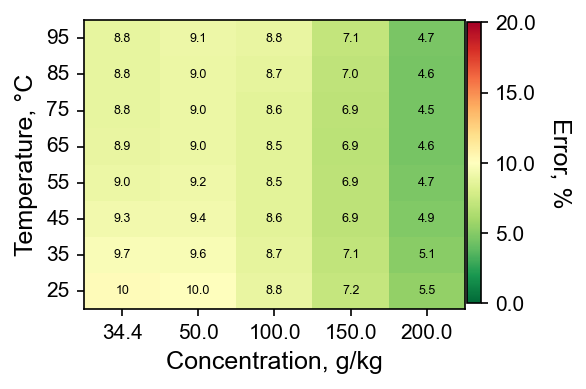

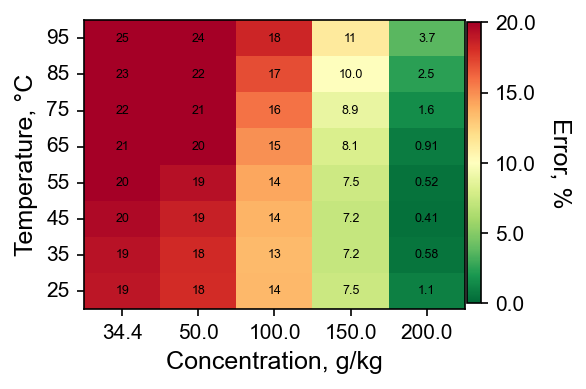

In [14]:

# colormap_prop_error(data_property_seawater, error_sea, xticks, yticks, 1, "Osmotic Pressure", "plot_sea_Osm_P")
colormap_prop_error(data_property_nacl, error_nacl, xticks, yticks, 1, "Osmotic Pressure", "plot_nacl_Osm_P")
colormap_prop_error(data_property_simple, error_simple, xticks, yticks, 1, "Osmotic Pressure", "plot_simple_Osm_P")

C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_16416\2734596188.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("RdYlGn_r") #matplotlib.colormaps.get_cmap(color)


(40,)
[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 0.21435492869516978 34.4 25.0
[0] [1] 0.2323274973242064 34.4 35.0
[0] [2] 0.2397542518918013 34.4 45.0
[0] [3] 0.23997250665792497 34.4 55.0
[0] [4] 0.23644874886255707 34.4 65.0
[0] [5] 0.2314764053177164 34.4 75.0
[0] [6] 0.22696579330766203 34.4 85.0
[0] [7] 0.22421868112994947 34.4 95.0
[1] [0] 0.27566280189679526 50.0 25.0
[1] [1] 0.29709390442248385 50.0 35.0
[1] [2] 0.3068808064796365 50.0 45.0
[1] [3] 0.3088980283480111 50.0 55.0
[1] [4] 0.3064693722848812 50.0 65.0
[1] [5] 0.3023774801149584 50.0 75.0
[1] [6] 0.2985585315975936 50.0 85.0
[1] [7] 0.29646763378398694 50.0 95.0
[2] [0] 0.4086812521594294 100.0 25.0
[2] [1] 0.4344523141813962 100.0 35.0
[2] [2] 0.44795691415471767 100.0 45.0
[2] [3] 0.4534152963787872 100.0 55.0
[2] [4] 0.4547175145303681 100.0 65.0
[2] [5] 0.45457173695167086 100.0 75.0
[2] [6] 0.4552619792262401 100.0 85.0
[2] [7] 0.4582541852158747 100.0 95.0
[3] [0] 0.467525833811

C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_16416\2734596188.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("RdYlGn_r") #matplotlib.colormaps.get_cmap(color)


(40,)
[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 2.121037125490614 34.4 25.0
[0] [1] 1.8057914944176578 34.4 35.0
[0] [2] 1.4168372155382798 34.4 45.0
[0] [3] 0.9605833025485769 34.4 55.0
[0] [4] 0.44263205787070947 34.4 65.0
[0] [5] 0.1325454504127144 34.4 75.0
[0] [6] 0.7617284384763517 34.4 85.0
[0] [7] 1.4426463059102457 34.4 95.0
[1] [0] 3.1062207744138406 50.0 25.0
[1] [1] 2.7834082387172936 50.0 35.0
[1] [2] 2.391600992482197 50.0 45.0
[1] [3] 1.9371338577735435 50.0 55.0
[1] [4] 1.4250973673600749 50.0 65.0
[1] [5] 0.859842585258057 50.0 75.0
[1] [6] 0.2444012170183097 50.0 85.0
[1] [7] 0.41921003420881364 50.0 95.0
[2] [0] 5.8555051464088015 100.0 25.0
[2] [1] 5.512763335928588 100.0 35.0
[2] [2] 5.113977090718625 100.0 45.0
[2] [3] 4.664571829525011 100.0 55.0
[2] [4] 4.169122332906896 100.0 65.0
[2] [5] 3.631177241538823 100.0 75.0
[2] [6] 3.053241220986251 100.0 85.0
[2] [7] 2.436835168008656 100.0 95.0
[3] [0] 8.130117152474616 150.0 25.0
[3]

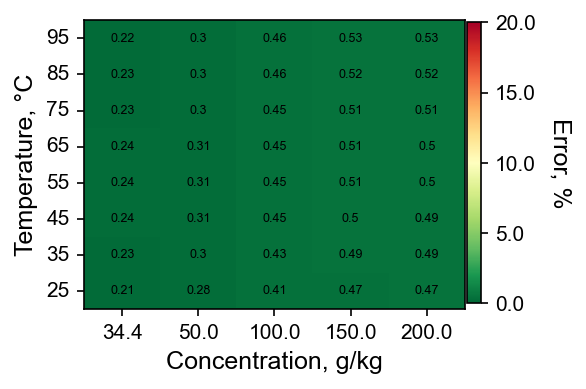

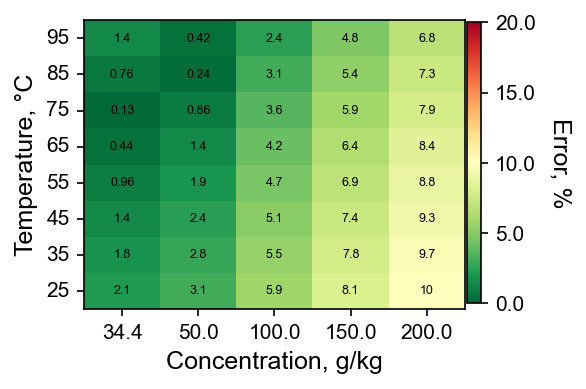

In [15]:
# colormap_prop_error(data_property_seawater, error_sea, xticks, yticks, 1, "Density", "plot_sea_dens")
colormap_prop_error(data_property_nacl, error_nacl, xticks, yticks, 1, "Density", "plot_nacl_dens")
colormap_prop_error(data_property_simple, error_simple, xticks, yticks, 1, "Density", "plot_simple_dens")

C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_16416\2734596188.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("RdYlGn_r") #matplotlib.colormaps.get_cmap(color)


(40,)
[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 5.738179262133679 34.4 25.0
[0] [1] 1.2239955840074273 34.4 35.0
[0] [2] 2.343064672563357 34.4 45.0
[0] [3] 1.4275377893786338 34.4 55.0
[0] [4] 0.34941909735228827 34.4 65.0
[0] [5] 0.3223288012078002 34.4 75.0
[0] [6] 0.5756458524616115 34.4 85.0
[0] [7] 0.5599777437190255 34.4 95.0
[1] [0] 5.736502508880288 50.0 25.0
[1] [1] 1.2073355899331566 50.0 35.0
[1] [2] 2.315943794146408 50.0 45.0
[1] [3] 1.395371846386067 50.0 55.0
[1] [4] 0.31534342197389953 50.0 65.0
[1] [5] 0.3567182242343632 50.0 75.0
[1] [6] 0.6096509181638167 50.0 85.0
[1] [7] 0.5932154686325691 50.0 95.0
[2] [0] 5.61603110704239 100.0 25.0
[2] [1] 1.3011632577369983 100.0 35.0
[2] [2] 2.3795386943985455 100.0 45.0
[2] [3] 1.4355855593317017 100.0 55.0
[2] [4] 0.3416297959202624 100.0 65.0
[2] [5] 0.33616709868478833 100.0 75.0
[2] [6] 0.5887556215323854 100.0 85.0
[2] [7] 0.5681872066597706 100.0 95.0
[3] [0] 5.4730516302948145 150.0 25.

C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_16416\2734596188.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("RdYlGn_r") #matplotlib.colormaps.get_cmap(color)


(40,)
[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 610.4876901917927 34.4 25.0
[0] [1] 415.205821186281 34.4 35.0
[0] [2] 281.5035809265653 34.4 45.0
[0] [3] 187.98801531777676 34.4 55.0
[0] [4] 121.27422391260015 34.4 65.0
[0] [5] 72.80107919130236 34.4 75.0
[0] [6] 36.97806495027658 34.4 85.0
[0] [7] 10.083470671771314 34.4 95.0
[1] [0] 613.2933431647173 50.0 25.0
[1] [1] 417.24038621031576 50.0 35.0
[1] [2] 283.01013880371426 50.0 45.0
[1] [3] 189.12525149824936 50.0 55.0
[1] [4] 122.14807170180973 50.0 65.0
[1] [5] 73.48350231375095 50.0 75.0
[1] [6] 37.51898012487304 50.0 85.0
[1] [7] 10.518198755007727 50.0 95.0
[2] [0] 624.147867720447 100.0 25.0
[2] [1] 425.11161792572915 100.0 35.0
[2] [2] 288.83858750183373 100.0 45.0
[2] [3] 193.52495911773354 100.0 55.0
[2] [4] 125.52858377119323 100.0 65.0
[2] [5] 76.12346371389684 100.0 75.0
[2] [6] 39.61169643652137 100.0 85.0
[2] [7] 12.200021163672542 100.0 95.0
[3] [0] 636.9828814752494 150.0 25.0
[3] [1] 

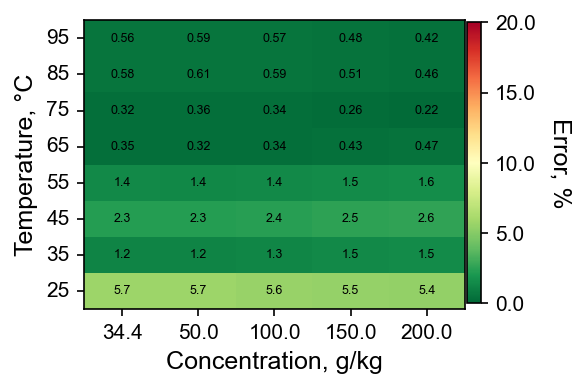

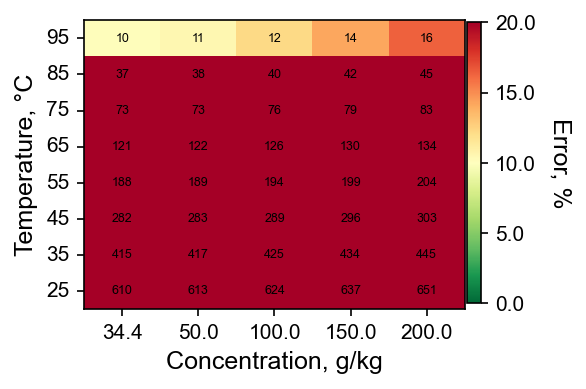

In [16]:
# colormap_prop_error(data_property_seawater, error_sea, xticks, yticks, 0, "Vap Pressure", "plot_sea_vap_P")
colormap_prop_error(data_property_nacl, error_nacl, xticks, yticks, 2, "Vap Pressure", "plot_nacl_vap_P")
colormap_prop_error(data_property_simple, error_simple, xticks, yticks, 2, "Vap Pressure", "plot_simple_vap_P")

C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_16416\2734596188.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("RdYlGn_r") #matplotlib.colormaps.get_cmap(color)


(40,)
[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 1.9785135224467312 34.4 25.0
[0] [1] 1.9968790880882794 34.4 35.0
[0] [2] 2.1263324347880457 34.4 45.0
[0] [3] 2.3122767064088827 34.4 55.0
[0] [4] 2.5349604915083805 34.4 65.0
[0] [5] 2.786658233769802 34.4 75.0
[0] [6] 3.0641414614576994 34.4 85.0
[0] [7] 3.36676893075222 34.4 95.0
[1] [0] 2.924678929853769 50.0 25.0
[1] [1] 2.9074904174825904 50.0 35.0
[1] [2] 3.0513118660848875 50.0 45.0
[1] [3] 3.2835554438849868 50.0 55.0
[1] [4] 3.57769871605761 50.0 65.0
[1] [5] 3.92276998667618 50.0 75.0
[1] [6] 4.314297308848969 50.0 85.0
[1] [7] 4.750833732460565 50.0 95.0
[2] [0] 5.683800963344417 100.0 25.0
[2] [1] 5.48672383854906 100.0 35.0
[2] [2] 5.6448647115141695 100.0 45.0
[2] [3] 6.008607427432549 100.0 55.0
[2] [4] 6.523512116942327 100.0 65.0
[2] [5] 7.167099634142166 100.0 75.0
[2] [6] 7.930214645322218 100.0 85.0
[2] [7] 8.810401894668649 100.0 95.0
[3] [0] 7.999048875099933 150.0 25.0
[3] [1] 7.594

C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_16416\2734596188.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("RdYlGn_r") #matplotlib.colormaps.get_cmap(color)


(40,)
[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 5.195659398691353 34.4 25.0
[0] [1] 5.498354854171247 34.4 35.0
[0] [2] 5.751870002579321 34.4 45.0
[0] [3] 5.992021451852455 34.4 55.0
[0] [4] 6.232684869609662 34.4 65.0
[0] [5] 6.480599754142351 34.4 75.0
[0] [6] 6.73928553411981 34.4 85.0
[0] [7] 7.010970718712711 34.4 95.0
[1] [0] 7.731804994613406 50.0 25.0
[1] [1] 8.037209618168138 50.0 35.0
[1] [2] 8.328248581066301 50.0 45.0
[1] [3] 8.63163621885773 50.0 55.0
[1] [4] 8.957935174377587 50.0 65.0
[1] [5] 9.312413938038516 50.0 75.0
[1] [6] 9.698234959195293 50.0 85.0
[1] [7] 10.117542972699693 50.0 95.0
[2] [0] 16.178723436409953 100.0 25.0
[2] [1] 16.10741502550682 100.0 35.0
[2] [2] 16.316513928746488 100.0 45.0
[2] [3] 16.705634506021745 100.0 55.0
[2] [4] 17.238193695972555 100.0 65.0
[2] [5] 17.899217501032773 100.0 75.0
[2] [6] 18.68278039629037 100.0 85.0
[2] [7] 19.587714513792807 100.0 95.0
[3] [0] 24.98756699477048 150.0 25.0
[3] [1] 24.066

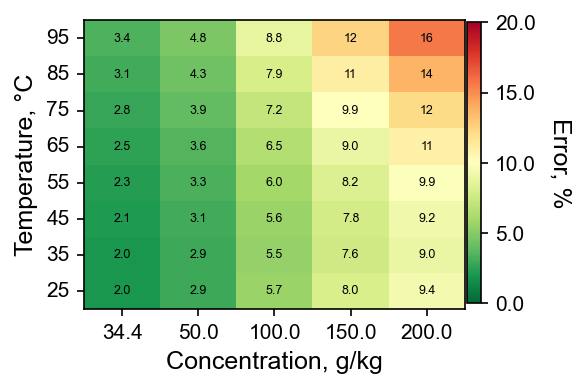

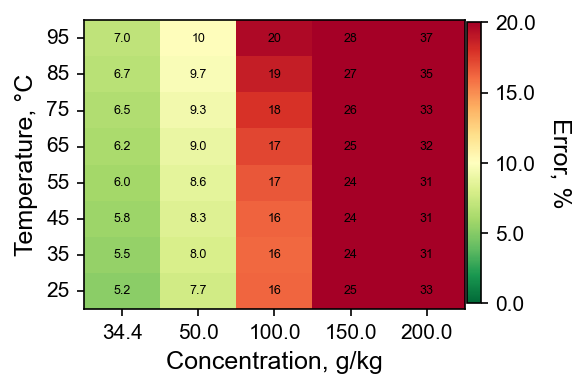

In [17]:
# colormap_prop_error(data_property_seawater, error_sea, xticks, yticks, 2, "Enthalpy", "plot_sea_Enthalpy")
colormap_prop_error(data_property_nacl, error_nacl, xticks, yticks, 2, "Enthalpy", "plot_nacl_Enthalpy")
colormap_prop_error(data_property_simple, error_simple, xticks, yticks, 2, "Enthalpy", "plot_simple_Enthalpy")